In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/angel/OneDrive/Desktop/New folder (2)/MONTH4/Task15/Task 15-Social Network Ads (2).csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


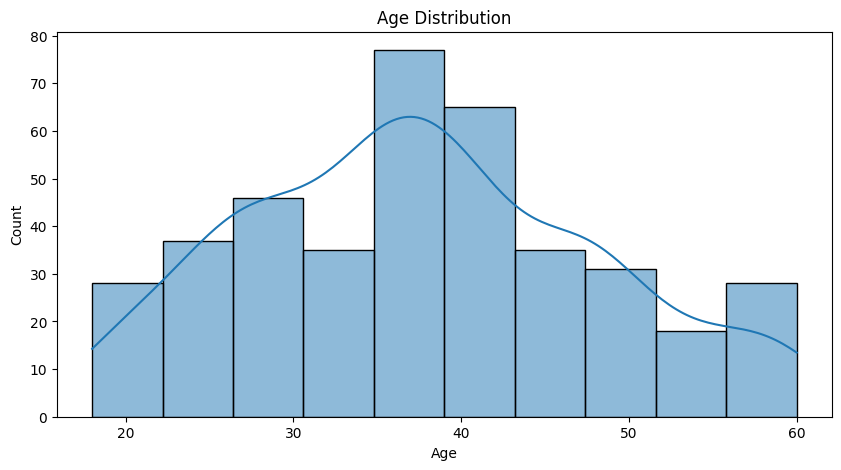

In [7]:
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Age'], kde=True) 
plt.title('Age Distribution') 
plt.show()

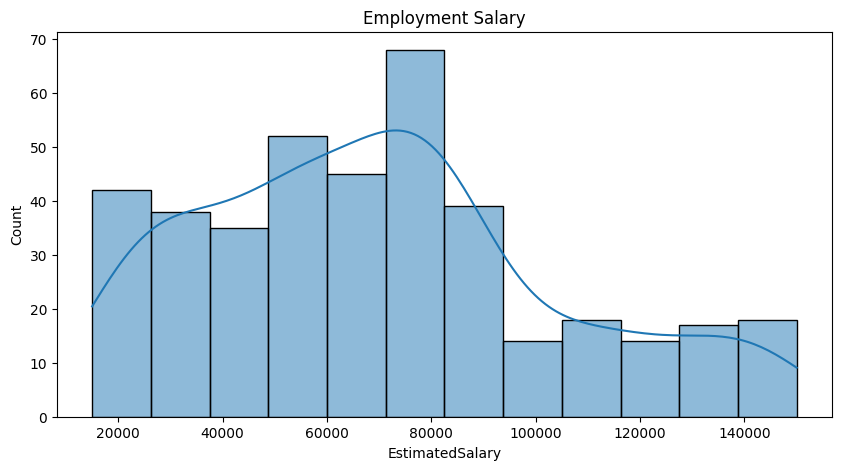

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['EstimatedSalary'], kde=True) 
plt.title('Employment Salary') 
plt.show()

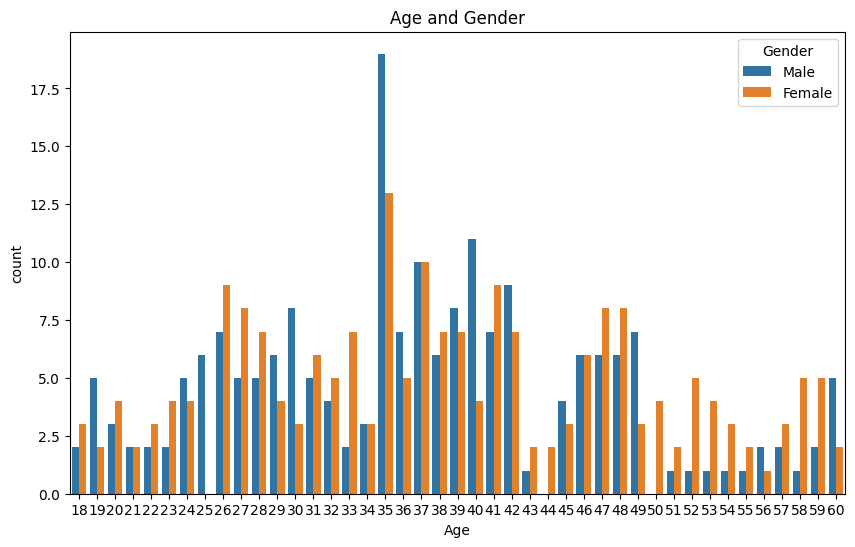

In [9]:
# Create the count plot 
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Gender', data=df)
#plt.figure(figsize=(10, 5))
 
plt.title('Age and Gender') 
plt.show()

In [10]:
numeric_columns = df.select_dtypes(include=[np.number])
# Identify columns with non-numeric values 
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns 
# Check for unique values in non-numeric columns to handle accordingly
for col in non_numeric_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
# Replace non-numeric values with NaN or handle as needed 
    df.replace('below_0', np.nan, inplace=True)

Unique values in Gender: ['Male' 'Female']


In [11]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Gender'])

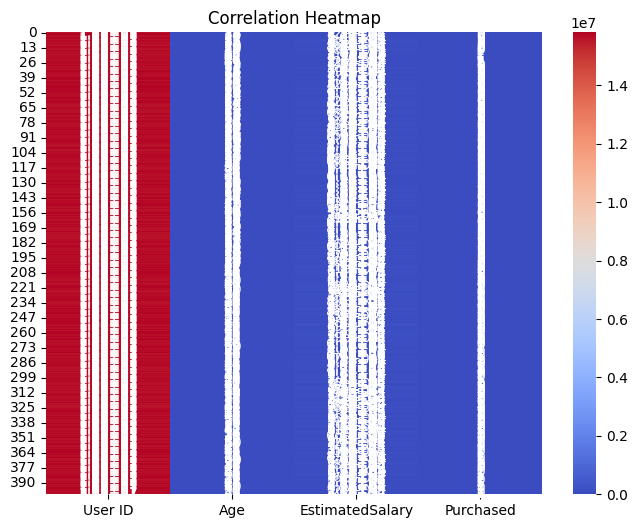

In [12]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Gender'])
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_numeric, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap') 
plt.show()

In [13]:
from sklearn.model_selection import train_test_split 
X = df[['Age', 'Purchased']]
y = df['Gender'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test) 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[42 19]
 [33 26]]
              precision    recall  f1-score   support

      Female       0.56      0.69      0.62        61
        Male       0.58      0.44      0.50        59

    accuracy                           0.57       120
   macro avg       0.57      0.56      0.56       120
weighted avg       0.57      0.57      0.56       120



# Step 7: Actionable Insights
Based on the analysis and model predictions, here are some actionable insights for advertisers and marketers:

Target Demographics: Focus on age groups and genders that show higher engagement and purchasing rates.

Personalized Messaging: Tailor ad messages to resonate with the identified target demographics.

Budget Allocation: Allocate more budget to ads targeted at demographics with higher conversion rates.

Continuous Monitoring: Regularly update and monitor ad performance to adjust strategies accordingly.

By following this approach, advertisers and marketers can make data-driven decisions to optimize their ad campaigns on social media platforms.